#  <span style="color:orange">Pycaret usando a base de dados do projeto</span>

# Carregando os dados

In [5]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [6]:
df.shape

(750000, 15)

In [7]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [8]:
dataset = df.sample(50000)

In [9]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [11]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (47500, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2500, 13)


In [12]:
from pycaret.classification import *

C:\Users\lucas_000\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\lucas_000\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\lucas_000\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


# Configurando o pycaret

In [13]:
exp_clf101 = setup(data = data, target = 'mau', session_id=123) 

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:02:49
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
sexo,Categorical
posse_de_veiculo,Categorical
posse_de_imovel,Categorical
qtd_filhos,Categorical
tipo_renda,Categorical
educacao,Categorical
estado_civil,Categorical
tipo_residencia,Categorical
idade,Numeric
tempo_emprego,Numeric


quit


SystemExit: Read the documentation of setup to learn how to overwrite data types over the inferred types. setup function must run again before you continue modeling.

In [14]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [15]:
#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [16]:
exp_clf101 = setup(data = data, target = 'mau', session_id=123) 

,Description,Value
0,session_id,123
1,Target,mau
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(47500, 13)"
5,Missing Values,1
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,0
9,High Cardinality Features,0


# Comparando todos os modelos

In [17]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9223,0.7692,0.0154,0.5849,0.0297,0.0257,0.0817,0.8580
gbc,Gradient Boosting Classifier,0.9222,0.7728,0.0285,0.5441,0.0540,0.0463,0.1094,3.2150
lr,Logistic Regression,0.9220,0.7608,0.0000,0.0000,0.0000,0.0000,0.0000,2.3450
ridge,Ridge Classifier,0.9220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0510
qda,Quadratic Discriminant Analysis,0.9220,0.5000,0.0000,0.0000,0.0000,-0.0001,-0.0005,0.1990
lda,Linear Discriminant Analysis,0.9220,0.6404,0.0000,0.0000,0.0000,0.0000,0.0000,0.2170
dummy,Dummy Classifier,0.9220,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0400
lightgbm,Light Gradient Boosting Machine,0.9218,0.7600,0.0359,0.4825,0.0666,0.0564,0.1145,0.7950
xgboost,Extreme Gradient Boosting,0.9206,0.7448,0.0478,0.4340,0.0857,0.0710,0.1223,3.7990
knn,K Neighbors Classifier,0.9150,0.6307,0.0775,0.3177,0.1242,0.0967,0.1242,0.4000


In [10]:
#ordenando a tabela por AUC
best_model = compare_models(fold=10, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9219,0.7840,0.0345,0.3822,0.0627,0.0513,0.0946,0.6970
ada,Ada Boost Classifier,0.9221,0.7780,0.0251,0.2812,0.0454,0.0369,0.0673,0.2250
lightgbm,Light Gradient Boosting Machine,0.9220,0.7750,0.0400,0.4063,0.0722,0.0598,0.1071,0.3590
lr,Logistic Regression,0.9232,0.7737,0.0000,0.0000,0.0000,0.0000,0.0000,1.0140
xgboost,Extreme Gradient Boosting,0.9185,0.7541,0.0588,0.3284,0.0993,0.0779,0.1111,1.9830
rf,Random Forest Classifier,0.9077,0.7282,0.0815,0.2226,0.1191,0.0815,0.0931,0.4800
nb,Naive Bayes,0.8556,0.6788,0.1581,0.1363,0.1317,0.0610,0.0655,0.0280
knn,K Neighbors Classifier,0.9164,0.6663,0.0948,0.3427,0.1475,0.1183,0.1463,0.1280
et,Extra Trees Classifier,0.8831,0.6406,0.1097,0.1472,0.1254,0.0644,0.0652,0.5430
lda,Linear Discriminant Analysis,0.9232,0.6254,0.0000,0.0000,0.0000,0.0000,0.0000,0.0710


In [19]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Criando um modelo

In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 8.3 Gradient Boosting Classifier

In [20]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9224,0.7937,0.0323,0.3077,0.0584,0.0449,0.0788
1,0.9260,0.7916,0.0242,0.6000,0.0465,0.0410,0.1098
2,0.9230,0.8031,0.0403,0.3571,0.0725,0.0582,0.0991
3,0.9212,0.7760,0.0242,0.2308,0.0438,0.0301,0.0528
4,0.9254,0.7727,0.0488,0.4615,0.0882,0.0752,0.1314
5,0.9266,0.7921,0.0569,0.5385,0.1029,0.0901,0.1575
6,0.9200,0.7921,0.0244,0.1875,0.0432,0.0266,0.0427
7,0.9278,0.8042,0.0732,0.6000,0.1304,0.1162,0.1918
8,0.9230,0.7805,0.0407,0.3333,0.0725,0.0573,0.0945


# Model tunning (Hyperparameter Tunning)

### Gradient Boosting

In [31]:
tuned_gbc = tune_model(gbc, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8984,0.6124,0.1210,0.2000,0.1508,0.1002,0.1038
1,0.8827,0.6642,0.1532,0.1743,0.1631,0.1003,0.1006
2,0.9008,0.6948,0.2016,0.2747,0.2326,0.1809,0.1833
3,0.9008,0.5858,0.0968,0.1846,0.1270,0.0798,0.0845
4,0.8959,0.6640,0.1220,0.1875,0.1478,0.0950,0.0975
5,0.8833,0.6045,0.1382,0.1619,0.1491,0.0869,0.0872
6,0.8911,0.6558,0.1382,0.1848,0.1581,0.1012,0.1024
7,0.8965,0.6338,0.1789,0.2366,0.2037,0.1495,0.1512
8,0.8959,0.6229,0.1138,0.1795,0.1393,0.0869,0.0894


# Analisando o resultado do modelo

### 10.1 AUC Plot

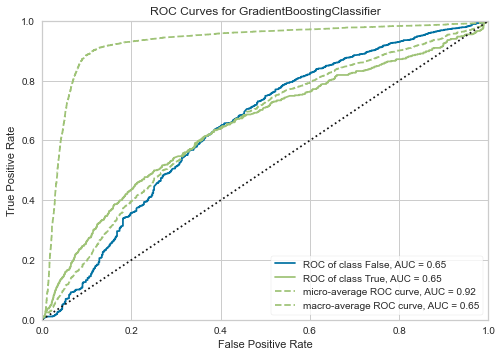

In [32]:
plot_model(tuned_gbc, plot = 'auc')

### 10.2 Precision-Recall Plot

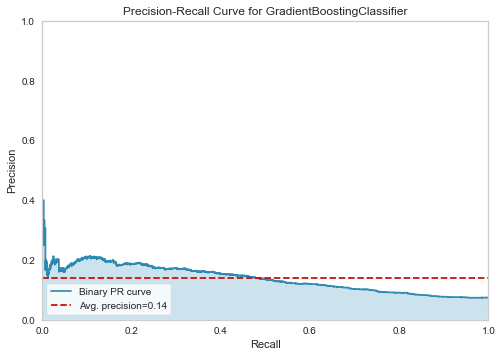

In [33]:
plot_model(tuned_gbc, plot = 'pr')

### 10.3 Importância das variáveis (Feature Importance) Plot

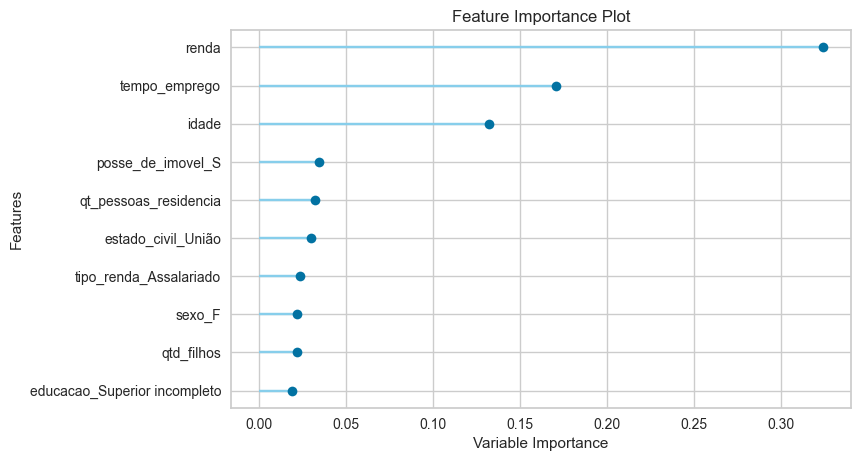

In [34]:
plot_model(tuned_gbc, plot='feature')

### 10.4 Matriz de confusão (Confusion matrix)

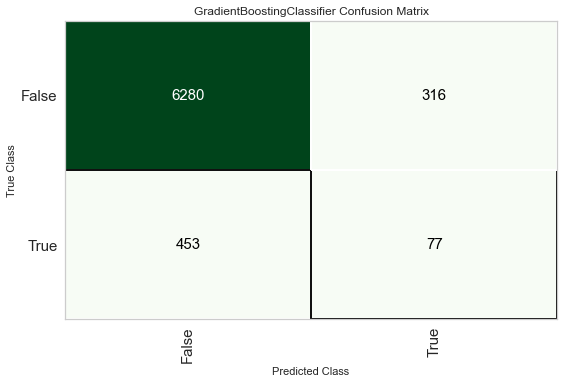

In [35]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [36]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predict na amostra de validação / hold-out

In [37]:
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8921,0.6500,0.1453,0.1959,0.1668,0.1105,0.1119


# Finalizando o modelo para deploy

In [39]:
final_gbc = finalize_model(tuned_gbc)

In [40]:
#Parâmetros finais do modelo Random Forest para deploy
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [41]:
predict_model(final_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9099,0.7612,0.1962,0.3250,0.2447,0.1999,0.2071


# Predizendo o conjunto de dados que não foi usado no treino

In [42]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8864,0.6677,0.1028,0.1930,0.1341,0.0794,0.0839


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,Label,Score
0,F,N,S,0,Assalariado,Superior completo,Separado,Casa,60,4.216438,1.0,7084.76,False,False,0.9838
1,F,N,S,0,Empresário,Médio,Solteiro,Aluguel,42,8.860274,1.0,22359.14,False,False,0.9930
2,F,S,S,0,Assalariado,Médio,Casado,Casa,47,4.895890,2.0,9643.94,False,False,0.9795
3,F,N,S,2,Empresário,Superior completo,Casado,Casa,37,0.200000,4.0,5225.44,False,False,0.9594
4,F,N,S,2,Empresário,Médio,Casado,Casa,41,8.695890,4.0,15386.78,False,False,0.9826


In [45]:
unseen_predictions.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
Label                     object
Score                    float64
dtype: object

In [54]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['mau'].astype(str), unseen_predictions['Label'], metric = 'Accuracy')

0.8864

# Salvando o modelo final

In [55]:
save_model(final_gbc,'Final GBC Model 02Jun2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='mau',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                             learning_rate=0.4, loss='deviance',
                                             max_depth=8, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min

(DICA: É sempre bom usar data no nome do arquivo ao salvar modelos, é bom para controle de versão.)

# Carregando o modelo salvo

Para carregar um modelo salvo em uma data futura no mesmo ambiente ou em um ambiente alternativo, usaríamos a função `load_model()` do PyCaret e, em seguida, aplicaríamos facilmente o modelo salvo em novos dados não vistos para previsão.

In [23]:
saved_final_gbc = load_model('Final GBC Model 02Jun2022')

Transformation Pipeline and Model Successfully Loaded


Uma vez que o modelo é carregado no ambiente, você pode simplesmente usá-lo para prever quaisquer novos dados usando a mesma função `predict_model()`. Abaixo, aplicamos o modelo carregado para prever o mesmo `data_unseen` que usamos na seção 13 acima.

In [24]:
new_prediction = predict_model(saved_final_gbc, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9068,0.6743,0.1180,0.2165,0.1527,0.1079,0.1135


In [59]:
new_prediction.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,Label,Score
0,F,N,S,0,Assalariado,Superior completo,Separado,Casa,60,4.216438,1.0,7084.76,False,False,0.9838
1,F,N,S,0,Empresário,Médio,Solteiro,Aluguel,42,8.860274,1.0,22359.14,False,False,0.9930
2,F,S,S,0,Assalariado,Médio,Casado,Casa,47,4.895890,2.0,9643.94,False,False,0.9795
3,F,N,S,2,Empresário,Superior completo,Casado,Casa,37,0.200000,4.0,5225.44,False,False,0.9594
4,F,N,S,2,Empresário,Médio,Casado,Casa,41,8.695890,4.0,15386.78,False,False,0.9826


In [60]:
from pycaret.utils import check_metric
check_metric(new_prediction['mau'].astype(str), new_prediction['Label'], metric = 'Accuracy')

0.8864

In [32]:
saved_final_gbc.named_steps

{'dtypes': DataTypes_Auto_infer(categorical_features=[], display_types=True,
                      features_todrop=[], id_columns=[],
                      ml_usecase='classification', numerical_features=[],
                      target='mau', time_features=[]),
 'imputer': Simple_Imputer(categorical_strategy='not_available',
                fill_value_categorical=None, fill_value_numerical=None,
                numeric_strategy='mean', target_variable=None),
 'new_levels1': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'ordinal': 'passthrough',
 'cardinality': 'passthrough',
 'znz': 'passthrough',
 'club_R_L': 'passthrough',
 'new_levels': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'feature_time': Make_Time_Features(list_of_features=None,
                    time_feature=Index([], dtype='object')),
 'group': 'passthrough',
 